# demo

In [1]:
%load_ext nb_black
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>

In [145]:
# export
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

from parkid.run.change_bandits import parkid
from parkid.run.change_bandits import parpar
from infomercial.utils import load_checkpoint
from shutil import rmtree

<IPython.core.display.Javascript object>

# Seed
Pick a random seed to share between examples.

In [169]:
seed = np.random.randint(0, 10000)
print(seed)

5408


<IPython.core.display.Javascript object>

# parkid

Total R (par): 72.0


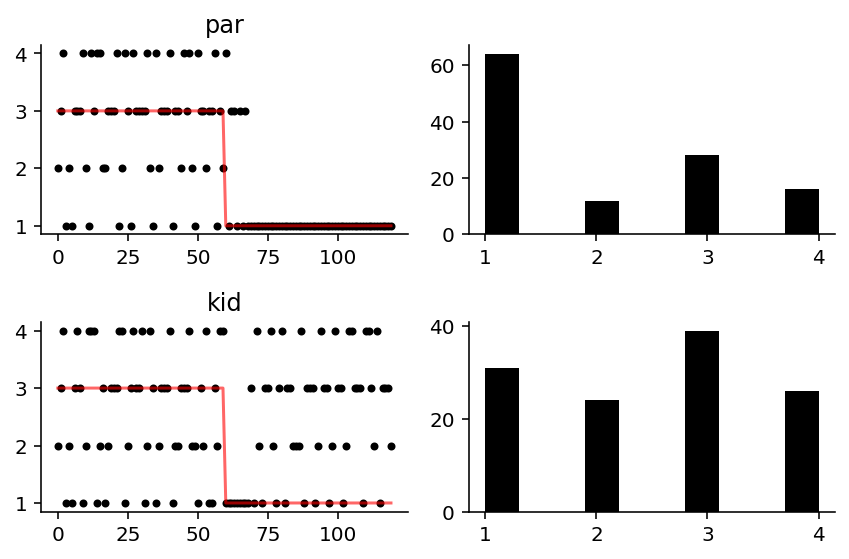

<IPython.core.display.Javascript object>

In [205]:
# Clean up
rmtree("demo")

# !
scores = parkid(
    num_episodes=120,
    change=60,
    par_boredom=0.0005,
    kid_boredom=0.001 / 10,
    set_point=10,
    lr_R=0.1,
    log_dir="demo",
    master_seed=seed,
)

# load
kid_action = pd.read_csv("demo/kid_action.csv")
par_action = pd.read_csv("demo/par_action.csv")
total_R = pd.read_csv("demo/total_R.csv")["total_R"].tolist()[-1]
best = pd.read_csv("demo/best.csv")

# results:
print(f"Total R (par): {total_R}")

# -
fig = plt.figure(figsize=(6, 4))

plt.subplot(221, title="par")
plt.plot(par_action["global_step"], par_action["par_action"] + 1, ".", color="k")
plt.plot(best["global_step"], best["best"] + 1, color="r", alpha=0.6)
plt.subplot(222, title="")
plt.hist(par_action["par_action"] + 1, color="black")

plt.subplot(223, title="kid")
plt.plot(kid_action["global_step"], kid_action["kid_action"] + 1, ".", color="k")
plt.plot(best["global_step"], best["best"] + 1, color="r", alpha=0.6)
plt.subplot(224, title="")
plt.hist(kid_action["kid_action"] + 1, color="black")

plt.tight_layout()
sns.despine()

# parpar

Total R (par): 49.5


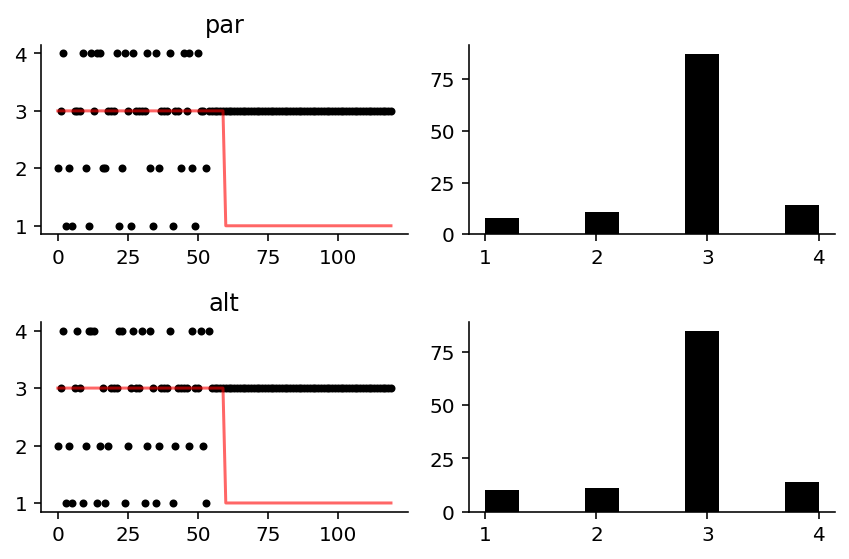

<IPython.core.display.Javascript object>

In [204]:
# Clean up
rmtree("demo")

# 1
scores = parpar(
    num_episodes=120,
    change=60,
    par_boredom=0.001,
    lr_R=0.1,
    log_dir="demo",
    master_seed=seed,
)

# load
alt_action = pd.read_csv("demo/alt_action.csv")
par_action = pd.read_csv("demo/par_action.csv")
best = pd.read_csv("demo/best.csv")
total_R = pd.read_csv("demo/total_R.csv")["total_R"].tolist()[-1]

# reesults:
print(f"Total R (par): {total_R}")

# -
fig = plt.figure(figsize=(6, 4))

plt.subplot(221, title="par")
plt.plot(par_action["global_step"], par_action["par_action"] + 1, ".", color="k")
plt.plot(best["global_step"], best["best"] + 1, color="r", alpha=0.6)
plt.subplot(222, title="")
plt.hist(par_action["par_action"] + 1, color="black")

plt.subplot(223, title="alt")
plt.plot(alt_action["global_step"], alt_action["alt_action"] + 1, ".", color="k")
plt.plot(best["global_step"], best["best"] + 1, color="r", alpha=0.6)
plt.subplot(224, title="")
plt.hist(alt_action["alt_action"] + 1, color="black")

plt.tight_layout()
sns.despine()